<a href="https://colab.research.google.com/github/Ha1ion/2025_NLP_HW1/blob/main/2025/Assignments/Assignment1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: Data Pre-processing

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os

current_dir = os.getcwd() 

PROJECT_ROOT = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))

DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
MODELS_DIR = os.path.join(PROJECT_ROOT, 'models')
os.makedirs(MODELS_DIR, exist_ok=True)

print(f"專案根目錄設定為: {PROJECT_ROOT}")
print(f"資料夾路徑設定為: {DATA_DIR}")
print(f"模型資料夾路徑設定為: {MODELS_DIR}")

專案根目錄設定為: C:\nthu\2025_NLP_HW1
資料夾路徑設定為: C:\nthu\2025_NLP_HW1\data
模型資料夾路徑設定為: C:\nthu\2025_NLP_HW1\models


In [3]:
import pandas as pd

In [4]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

'wget' 不是內部或外部命令、可執行的程式或批次檔。


In [3]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

FileNotFoundError: [Errno 2] No such file or directory: 'questions-words.txt'

In [5]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [6]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.

questions = []
categories = []
sub_categories = []

category_types = ['semantic'] * 5 + ['syntatic'] * 9
current_category = ''
current_sub_category = ''
category_count = -1

for line in data:
    # 如果一行以 ':' 開頭，表示這是一個新的子分類標題
    if line.startswith(':'):
        category_count += 1
        current_sub_category = line.strip()
        current_category = category_types[category_count]
    # 否則，這是一個類比問題
    else:
        questions.append(line.strip())
        categories.append(current_category)
        sub_categories.append(current_sub_category)

In [7]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [8]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,semantic,: capital-common-countries
2,Athens Greece Beijing China,semantic,: capital-common-countries
3,Athens Greece Berlin Germany,semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,semantic,: capital-common-countries


In [9]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [1]:
#!pip install gensim
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [10]:
data = pd.read_csv("questions-words.csv")

In [11]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

[==================================================] 100.0% 128.1/128.1MB downloaded
The Gensim model loaded successfully!


In [12]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      # 字串 (e.g., "Athens Greece Baghdad Iraq") 切分為四個單字，並轉為小寫
      word_a, word_b, word_c, word_d = analogy.lower().split()

      golds.append(word_d)

      try:
          predicted_word, _ = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)[0]
          preds.append(predicted_word)
      except KeyError:
          preds.append("")

  2%|▏         | 317/19544 [00:07<07:29, 42.77it/s]


KeyboardInterrupt: 

In [ ]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: semantic, Accuracy: 65.3399481339497%
Category: syntatic, Accuracy: 61.255269320843084%
Sub-Category: capital-common-countries, Accuracy: 93.87351778656127%
Sub-Category: capital-world, Accuracy: 88.94783377541998%
Sub-Category: currency, Accuracy: 14.203233256351039%
Sub-Category: city-in-state, Accuracy: 30.806647750304013%
Sub-Category: family, Accuracy: 81.62055335968378%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Category: gram2-opposite, Accuracy: 20.073891625615765%
Sub-Category: gram3-comparative, Accuracy: 79.12912912912913%
Sub-Category: gram4-superlative, Accuracy: 54.278074866310156%
Sub-Category: gram5-present-participle, Accuracy: 69.50757575757575%
Sub-Category: gram6-nationality-adjective, Accuracy: 87.86741713570981%
Sub-Category: gram7-past-tense, Accuracy: 55.44871794871795%
Sub-Category: gram8-plural, Accuracy: 71.996996996997%
Sub-Category: gram9-plural-verbs, Accuracy: 58.39080459770115%


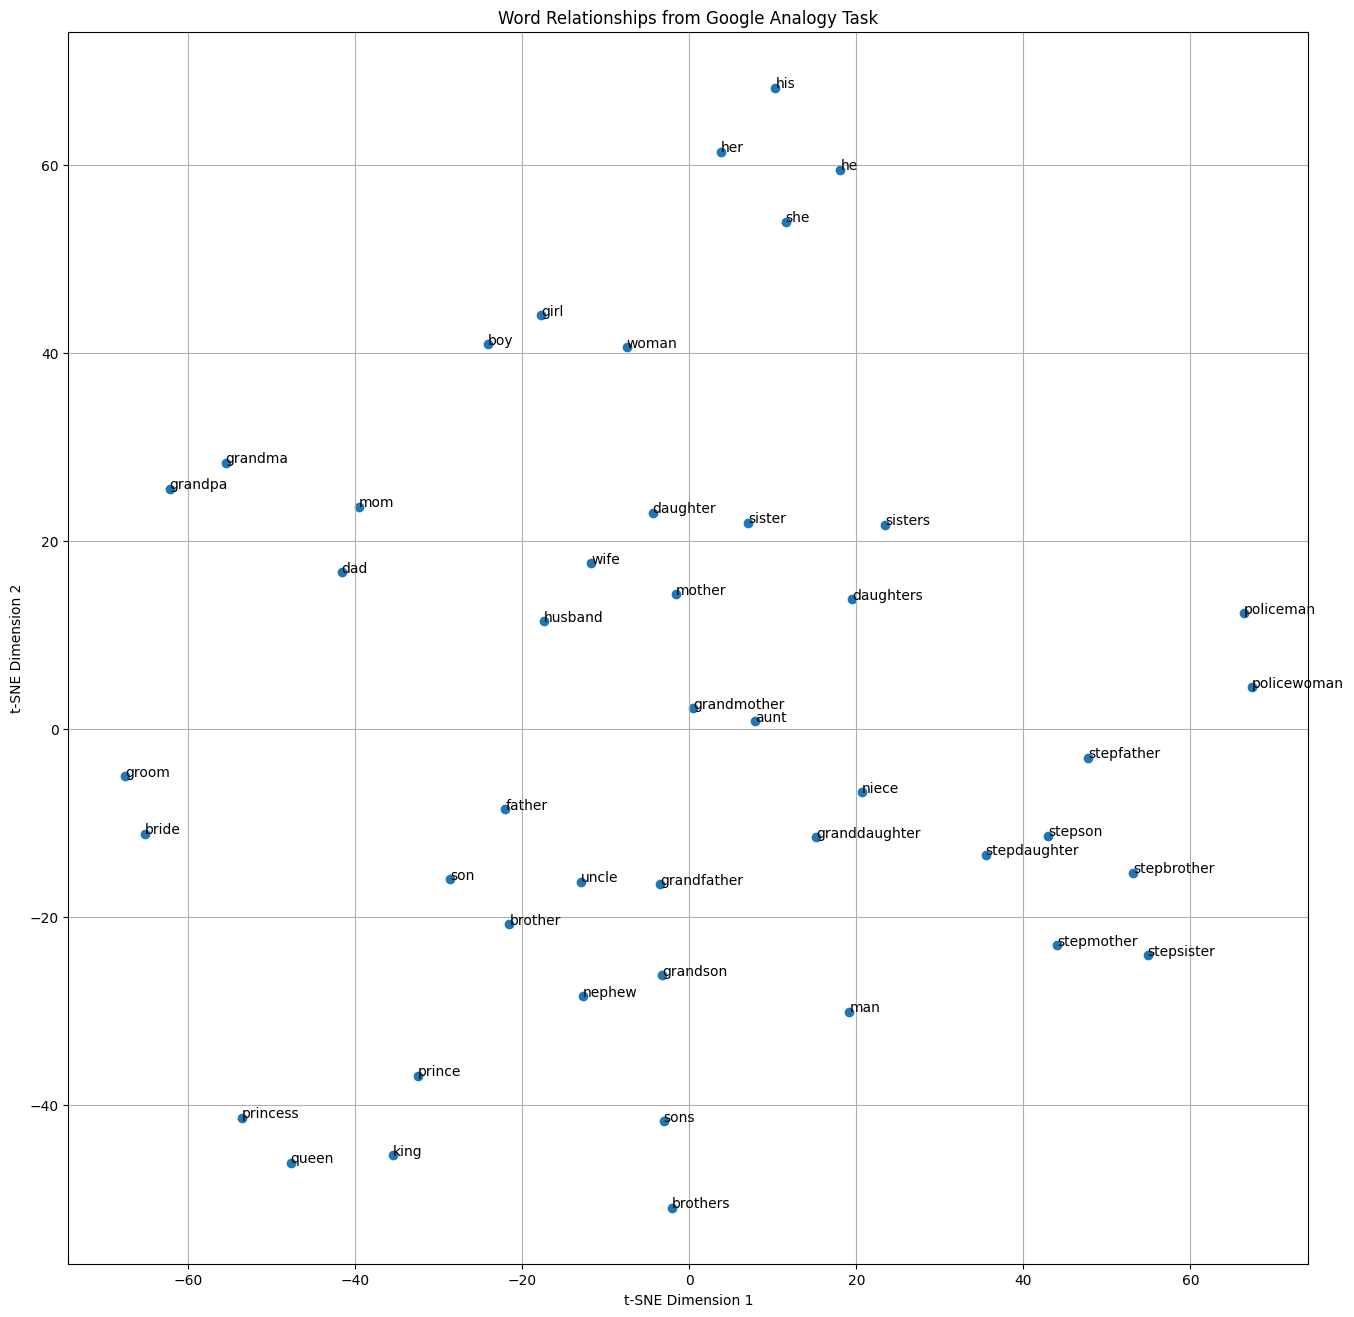

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`

family_questions = data[data["SubCategory"] == SUB_CATEGORY]["Question"]

words_in_family = set()
for q in family_questions:
    words_in_family.update(q.lower().split())

# 從模型中獲取單字的詞向量
word_vectors = []
words_for_plot = []
for word in words_in_family:
    try:
        word_vectors.append(model[word])
        words_for_plot.append(word)
    except KeyError:
        continue

word_vectors = np.array(word_vectors)

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(16, 16))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words_for_plot):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Word Relationships from Google Analogy Task")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

因為常常下載失敗所以改掛載已下載好的data

In [13]:
#!cp "/content/drive/MyDrive/2025_NLP_HW1/wiki_texts_combined.txt" .
#!cp "/content/drive/MyDrive/2025_NLP_HW1/sampled_wiki_20_percent.txt" .
#!cp "/content/drive/MyDrive/2025_NLP_HW1/sampled_wiki_5_percent.txt" .
#!cp "/content/drive/MyDrive/2025_NLP_HW1/sampled_wiki_1_percent.txt" .
#!cp "/content/drive/MyDrive/2025_NLP_HW1_wiki_dataset/"*.gz .
#!ls -l *.gz

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
#!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
#!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
#!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
#!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
#!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
#!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
#!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
#!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
#!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
#!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
#!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

In [ ]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

In [ ]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [14]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

anarchism is political philosophy and movement that is against all forms of authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy typically including the state and capitalism anarchism advocates for the replacement of the state with stateless societies and voluntary free associations as historically left wing movement this reading of anarchism is placed on the farthest left of the political spectrum usually described as the libertarian wing of the socialist movement libertarian socialism although traces of anarchist ideas are found all throughout history modern anarchism emerged from the enlightenment during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of thought formed during this period anarchists have taken part in several revolutions most notably in the paris commune

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [3]:
# TODO4: Sample `20%` Wikipedia articles
# Write your code here
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random

wiki_txt_path = "wiki_texts_combined.txt"
output_path = "sampled_wiki_20_percent.txt"
sampling_ratio = 0.2

print(f"開始進行機率抽樣 (Ratio: {sampling_ratio})...")
lines_written = 0

with open(wiki_txt_path, "r", encoding="utf-8") as f_in, \
     open(output_path, "w", encoding="utf-8") as f_out:

    # 用迴圈逐行讀取 避免一次性將整個檔案載入RAM
    for line in f_in:
        if random.random() < sampling_ratio:
            f_out.write(line)
            lines_written += 1

print(f"抽樣完成！共寫入 {lines_written} 行文章至檔案: {output_path}")

開始進行機率抽樣 (Ratio: 0.01)...
抽樣完成！共寫入 56538 行文章至檔案: sampled_wiki_1_percent.txt


In [20]:
# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.
import os
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from gensim.models.callbacks import CallbackAny2Vec 

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

current_dir = os.getcwd()
project_root = current_dir
while not os.path.exists(os.path.join(project_root, '.venv')):
    parent_dir = os.path.dirname(project_root)
    if parent_dir == project_root:
        project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
        break
    project_root = parent_dir

DATA_DIR = os.path.join(project_root, 'data')
MODELS_DIR = os.path.join(project_root, 'models')
os.makedirs(MODELS_DIR, exist_ok=True)
print(f"專案根目錄自動設定為: {project_root}")
print(f"資料夾路徑自動設定為: {DATA_DIR}")
print(f"模型資料夾路徑自動設定為: {MODELS_DIR}")
sampled_wiki_path = os.path.join(DATA_DIR, "sampled_wiki_1_percent.txt")

class CorpusStreamer:
    def __init__(self, filepath):
        self.filepath = filepath
        self.lemmatizer = WordNetLemmatizer()
    def __iter__(self):
        print("--- 開始串流讀取語料庫並進行預處理... ---")
        with open(self.filepath, "r", encoding="utf-8") as f:
            for line in tqdm(f, desc="正在預處理文章 (建立詞彙表)"):
                tokens = simple_preprocess(line)
                lemmatized_tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
                yield lemmatized_tokens

corpus_streamer = CorpusStreamer(sampled_wiki_path)

class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 1
    def on_epoch_end(self, model):
        print(f"\n--- Epoch #{self.epoch} 訓練完成 ---")
        self.epoch += 1

epoch_logger = EpochLogger()

print("\n--- 準備開始訓練 Word2Vec  ---")

my_optimized_model = Word2Vec(
    sentences=corpus_streamer,
    sg=1,
    vector_size=300,
    window=5,
    min_count=10,
    sample=1e-4,
    negative=5,
    workers=6,
    epochs=2,
    callbacks=[epoch_logger]
)

print("\n--- 所有訓練流程已全部完成 ---")

optimized_model_path = os.path.join(MODELS_DIR, "word2vec_wiki_1_percent.model")
my_optimized_model.save(optimized_model_path)
print(f"--- 模型已儲存至 {optimized_model_path} ---")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


專案根目錄自動設定為: C:\nthu\2025_NLP_HW1
資料夾路徑自動設定為: C:\nthu\2025_NLP_HW1\data
模型資料夾路徑自動設定為: C:\nthu\2025_NLP_HW1\models

--- 準備開始訓練 Word2Vec  ---
--- 開始串流讀取語料庫並進行預處理... ---


正在預處理文章 (建立詞彙表): 56538it [02:29, 378.72it/s]


--- 開始串流讀取語料庫並進行預處理... ---


正在預處理文章 (建立詞彙表): 56538it [02:49, 333.44it/s]



--- Epoch #1 訓練完成 ---
--- 開始串流讀取語料庫並進行預處理... ---


正在預處理文章 (建立詞彙表): 56538it [02:57, 319.10it/s]



--- Epoch #2 訓練完成 ---

--- 所有訓練流程已全部完成 ---
--- 模型已儲存至 C:\nthu\2025_NLP_HW1\models\word2vec_wiki_1_percent.model ---


In [1]:
data = pd.read_csv("questions-words.csv")

NameError: name 'pd' is not defined

In [1]:
import os
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm

current_dir = os.getcwd()

project_root = current_dir
while not os.path.exists(os.path.join(project_root, '.venv')):
    parent_dir = os.path.dirname(project_root)
    if parent_dir == project_root:
        project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
        break
    project_root = parent_dir

DATA_DIR = os.path.join(project_root, 'data')
MODELS_DIR = os.path.join(project_root, 'models')

print(f"專案根目錄自動設定為: {project_root}")
print(f"資料夾路徑自動設定為: {DATA_DIR}")
print(f"模型資料夾路徑自動設定為: {MODELS_DIR}")


model_path = os.path.join(MODELS_DIR, "word2vec_wiki_20_percent.model")
my_model = Word2Vec.load(model_path)
print(f"\n成功從 {model_path} 載入模型。")

csv_path = os.path.join(DATA_DIR, "questions-words.csv")
data = pd.read_csv(csv_path)
print(f"成功從 {csv_path} 載入評估資料。")

preds = []
golds = []

print("\n--- 開始使用自訓練模型進行預測... ---")
for analogy in tqdm(data["Question"]):
    word_a, word_b, word_c, word_d = analogy.lower().split()

    golds.append(word_d)

    try:
        predicted_word, _ = my_model.wv.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)[0]
        preds.append(predicted_word)
    except KeyError:
        preds.append("")

print("\n--- 使用自訓練模型預測完成 ---")

專案根目錄自動設定為: C:\nthu\2025_NLP_HW1
資料夾路徑自動設定為: C:\nthu\2025_NLP_HW1\data
模型資料夾路徑自動設定為: C:\nthu\2025_NLP_HW1\models


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\nthu\\2025_NLP_HW1\\models\\word2vec_wiki_20_percent.model'

In [17]:
print(f"預測完成後，golds 的長度為: {len(golds)}")
print(f"預測完成後，preds 的長度為: {len(preds)}")

預測完成後，golds 的長度為: 19544
預測完成後，preds 的長度為: 19544


In [22]:
import numpy as np

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    """計算兩個 ndarray 之間的一致性百分比"""
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)

print("--- 自訓練模型 (1% data) 評估 ---")
total_acc_mine = calculate_accuracy(golds_np, preds_np)
print(f"整體準確率: {total_acc_mine * 100:.2f}%\n")

print("--- 各個 Category 的準確率 ---")
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, 準確率: {acc_cat * 100:.2f}%")

print("\n--- 各個 Sub-Category 的準確率 ---")
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category {sub_category}, 準確率: {acc_subcat * 100:.2f}%")

--- 自訓練模型 (1% data) 評估 ---
整體準確率: 26.51%

--- 各個 Category 的準確率 ---
Category: semantic, 準確率: 32.55%
Category: syntatic, 準確率: 21.49%

--- 各個 Sub-Category 的準確率 ---
Sub-Category : capital-common-countries, 準確率: 70.16%
Sub-Category : capital-world, 準確率: 36.72%
Sub-Category : currency, 準確率: 6.12%
Sub-Category : city-in-state, 準確率: 25.01%
Sub-Category : family, 準確率: 39.72%
Sub-Category : gram1-adjective-to-adverb, 準確率: 4.23%
Sub-Category : gram2-opposite, 準確率: 1.72%
Sub-Category : gram3-comparative, 準確率: 26.28%
Sub-Category : gram4-superlative, 準確率: 7.58%
Sub-Category : gram5-present-participle, 準確率: 20.83%
Sub-Category : gram6-nationality-adjective, 準確率: 74.42%
Sub-Category : gram7-past-tense, 準確率: 22.37%
Sub-Category : gram8-plural, 準確率: 0.00%
Sub-Category : gram9-plural-verbs, 準確率: 5.06%


### 

資料夾路徑設定為: C:\nthu\2025_NLP_HW1\data
模型資料夾路徑設定為: C:\nthu\2025_NLP_HW1\models
輸出資料夾路徑設定為: C:\nthu\2025_NLP_HW1\outputs

正在為 Sub-Category ': family' 產生 t-SNE 視覺化...
成功找到 42 個相關詞彙，動態設定 perplexity 為: 10
t-SNE 圖片已儲存至: C:\nthu\2025_NLP_HW1\outputs\word_relationships_ownmodel.png


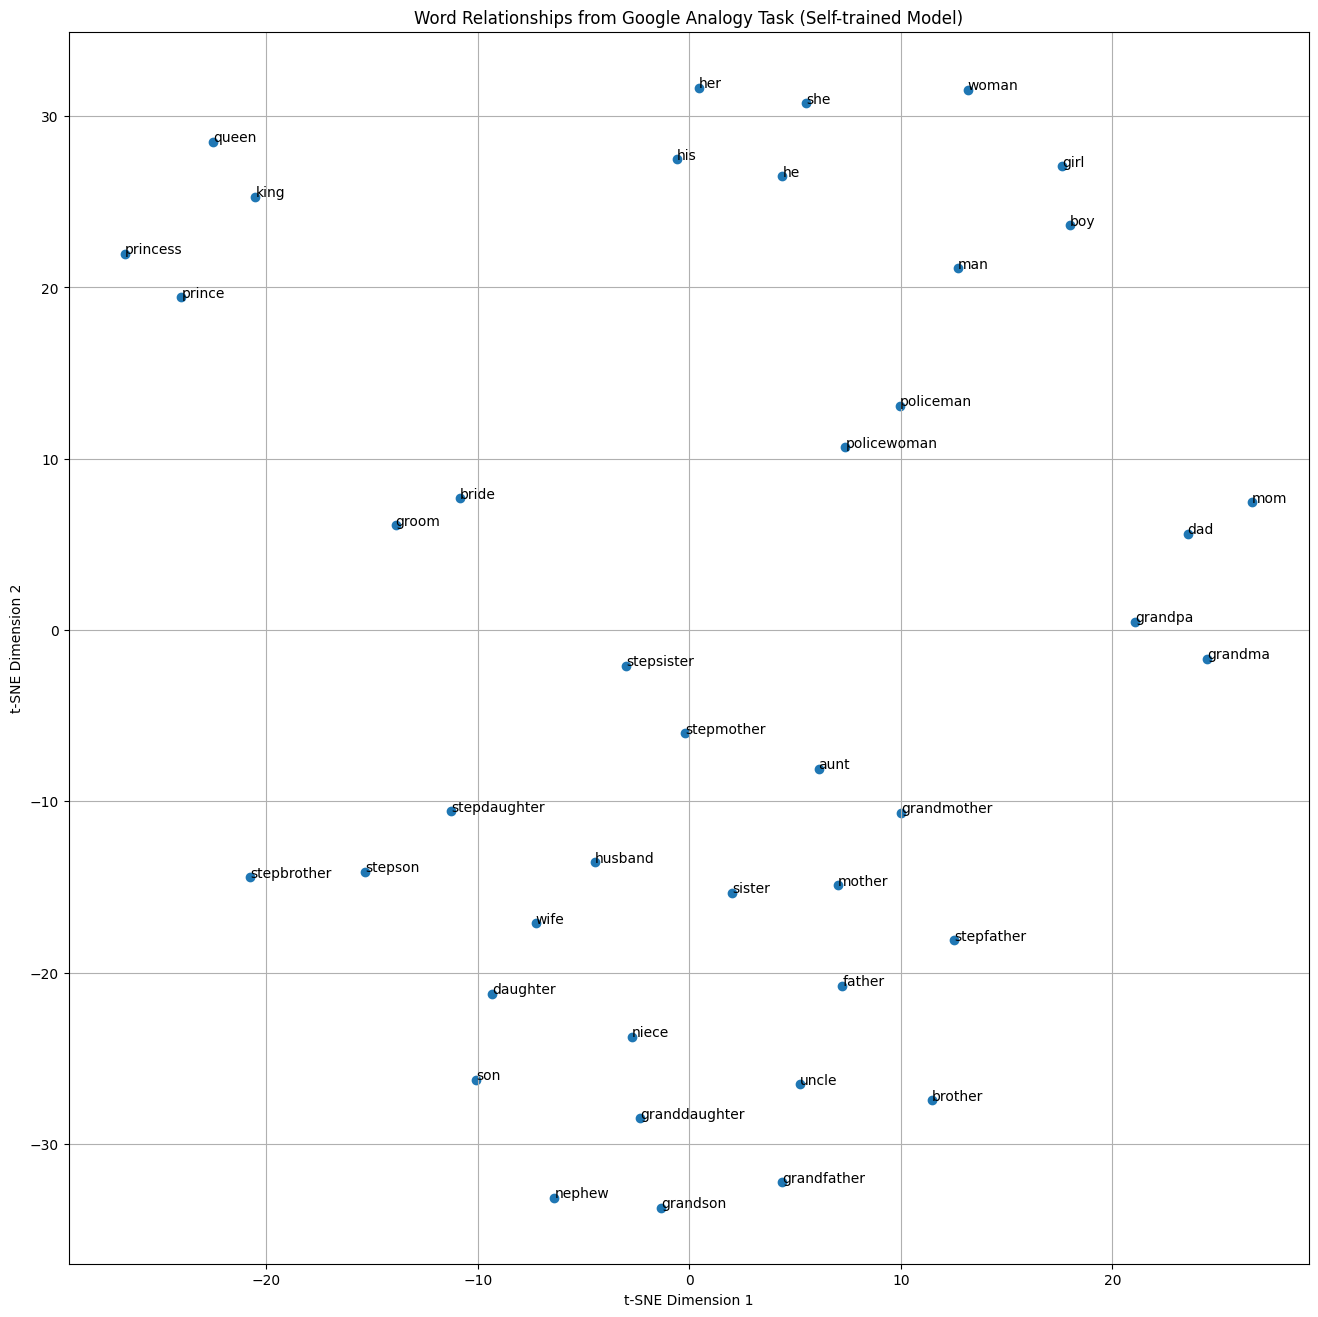

In [23]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`

import os
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

current_dir = os.getcwd()
project_root = current_dir
while not os.path.exists(os.path.join(project_root, '.venv')):
    parent_dir = os.path.dirname(project_root)
    if parent_dir == project_root:
        project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
        break
    project_root = parent_dir

DATA_DIR = os.path.join(project_root, 'data')
MODELS_DIR = os.path.join(project_root, 'models')
OUTPUTS_DIR = os.path.join(project_root, 'outputs') 

os.makedirs(OUTPUTS_DIR, exist_ok=True)

print(f"資料夾路徑設定為: {DATA_DIR}")
print(f"模型資料夾路徑設定為: {MODELS_DIR}")
print(f"輸出資料夾路徑設定為: {OUTPUTS_DIR}")

model_path = os.path.join(MODELS_DIR, "word2vec_wiki_20_percent_optimized.model")
my_model = Word2Vec.load(model_path)

csv_path = os.path.join(DATA_DIR, "questions-words.csv")
data = pd.read_csv(csv_path)

SUB_CATEGORY = ": family"
print(f"\n正在為 Sub-Category '{SUB_CATEGORY}' 產生 t-SNE 視覺化...")

family_questions = data[data["SubCategory"] == SUB_CATEGORY]["Question"]
words_in_family = set()
for q in family_questions:
    words_in_family.update(q.lower().split())

word_vectors_mine = []
words_for_plot_mine = []
for word in words_in_family:
    try:
        word_vectors_mine.append(my_model.wv[word])
        words_for_plot_mine.append(word)
    except KeyError:
        continue

word_vectors_mine = np.array(word_vectors_mine)

n_samples = word_vectors_mine.shape[0]
perplexity_value = min(10, n_samples - 1)
print(f"成功找到 {n_samples} 個相關詞彙，動態設定 perplexity 為: {perplexity_value}")

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
vectors_2d_mine = tsne.fit_transform(word_vectors_mine)

plt.figure(figsize=(16, 16))
plt.scatter(vectors_2d_mine[:, 0], vectors_2d_mine[:, 1])

for i, word in enumerate(words_for_plot_mine):
    plt.annotate(word, xy=(vectors_2d_mine[i, 0], vectors_2d_mine[i, 1]))

plt.title("Word Relationships from Google Analogy Task (Self-trained Model)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)

output_image_path = os.path.join(OUTPUTS_DIR, "word_relationships_ownmodel.png")
plt.savefig(output_image_path, bbox_inches="tight")
print(f"t-SNE 圖片已儲存至: {output_image_path}")

plt.show()

In [24]:
# 作業第4點
words_to_check = ['apple', 'computer', 'taiwan', 'summer', 'eat']

for word in words_to_check:
    try:
        similar_words = my_model.wv.most_similar(word, topn=5)
        print(f"--- 和 '{word}' 最相近的 5 個詞是: ---")
        for sim_word, similarity in similar_words:
            print(f"{sim_word}: {similarity:.4f}")
        print("-" * 30)
        
    except KeyError:
        print(f"--- 單字 '{word}' 不在模型的詞彙表中 ---")
        print("-" * 30)

--- 和 'apple' 最相近的 5 個詞是: ---
blackberry: 0.6772
iphone: 0.6632
appgratis: 0.6333
appstore: 0.6329
ipod: 0.6304
------------------------------
--- 和 'computer' 最相近的 5 個詞是: ---
computing: 0.7148
software: 0.6857
superpaint: 0.6673
microcomputer: 0.6641
ibm: 0.6497
------------------------------
--- 和 'taiwan' 最相近的 5 個詞是: ---
china: 0.7819
taipei: 0.7613
taiwanese: 0.7345
tainan: 0.6966
fujian: 0.6872
------------------------------
--- 和 'summer' 最相近的 5 個詞是: ---
winter: 0.7795
olympics: 0.6296
universiades: 0.6166
deaflympics: 0.6156
autumn: 0.5983
------------------------------
--- 和 'eat' 最相近的 5 個詞是: ---
eats: 0.7177
eating: 0.7016
snacking: 0.6780
eaten: 0.6705
ate: 0.6697
------------------------------
